# importing all the needed libary

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("GEO.csv")

In [4]:
dataset.columns

Index(['diseaseId', 'geneId', 'geneSymbol', 'DSI', 'DPI', 'diseaseName',
       'diseaseType', 'diseaseClass', 'diseaseSemanticType', 'score', 'EI',
       'Gene_Description', 'PsychiatricDisorder', 'diseaseClassNameMSH',
       'doClassId', 'doClassName', 'umlsSemanticTypeId',
       'umlsSemanticTypeName', 'HGNC.ID', 'Approved.name', 'Ensembl.gene.ID'],
      dtype='object')

# dropping all the unwanted coloumns

In [4]:
dataset=dataset.drop(['diseaseId', 'geneId', 'geneSymbol', 'HGNC.ID', 'Approved.name', 'Ensembl.gene.ID','umlsSemanticTypeName','umlsSemanticTypeId'], axis = 1)

In [5]:
dataset=dataset.drop(['doClassId','doClassName'], axis = 1)

In [6]:
dataset.columns

Index(['DSI', 'DPI', 'diseaseName', 'diseaseType', 'diseaseClass',
       'diseaseSemanticType', 'score', 'EI', 'Gene_Description',
       'PsychiatricDisorder', 'diseaseClassNameMSH'],
      dtype='object')

In [7]:
dataset.dtypes

DSI                    float64
DPI                    float64
diseaseName             object
diseaseType             object
diseaseClass            object
diseaseSemanticType     object
score                  float64
EI                     float64
Gene_Description        object
PsychiatricDisorder     object
diseaseClassNameMSH     object
dtype: object

# finding all the types of Category present present in the Target variable

In [8]:
dataset['PsychiatricDisorder'].value_counts()

DEPRESSIVE DISORDERS                                    2220
SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS    1791
BIPOLAR DISORDERS AND RELATED DISORDERS                  706
ALCOHOL USE DISORDERS                                    532
CANNABIS USE DISORDERS                                    73
COCAINE USE DISORDERS                                     73
Name: PsychiatricDisorder, dtype: int64

#Changing all the Object type columns to Category types and then using Cat.coding, changing all the str type data to interger 
#type for prediction

In [9]:
dataset['diseaseName'] = dataset['diseaseName'].astype('category')
dataset['diseaseType'] = dataset['diseaseType'].astype('category')
dataset['diseaseClass'] = dataset['diseaseClass'].astype('category')
dataset['diseaseSemanticType'] = dataset['diseaseSemanticType'].astype('category')
dataset['Gene_Description'] = dataset['Gene_Description'].astype('category')
dataset['diseaseClassNameMSH'] = dataset['diseaseClassNameMSH'].astype('category')
dataset['PsychiatricDisorder'] = dataset['PsychiatricDisorder'].astype('category')

In [10]:
dataset.dtypes

DSI                     float64
DPI                     float64
diseaseName            category
diseaseType            category
diseaseClass           category
diseaseSemanticType    category
score                   float64
EI                      float64
Gene_Description       category
PsychiatricDisorder    category
diseaseClassNameMSH    category
dtype: object

In [11]:
dataset['diseaseName'] = dataset['diseaseName'].cat.codes
dataset['diseaseType'] = dataset['diseaseType'].cat.codes
dataset['diseaseClass'] = dataset['diseaseClass'].cat.codes
dataset['diseaseSemanticType'] = dataset['diseaseSemanticType'].cat.codes
dataset['Gene_Description'] = dataset['Gene_Description'].cat.codes
dataset['diseaseClassNameMSH'] = dataset['diseaseClassNameMSH'].cat.codes

In [12]:
dataset.dtypes

DSI                     float64
DPI                     float64
diseaseName                int8
diseaseType                int8
diseaseClass               int8
diseaseSemanticType        int8
score                   float64
EI                      float64
Gene_Description           int8
PsychiatricDisorder    category
diseaseClassNameMSH        int8
dtype: object

#Defining the Label and Attributes

In [13]:
X = dataset.drop('PsychiatricDisorder', axis=1)
y = dataset['PsychiatricDisorder']

#splitting the dataset for training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

# Random Forest Classification 

In [16]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

#finding the Classification_report, Confusion_matrix, Accuracy_score for the trained model

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

cs=cross_val_score(RF, X, y, cv=5, scoring='recall_macro')

print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nAccuracy Score: ",accuracy_score(y_test, y_pred))
print("\nAUC Score: ", cs)
print("\nMean AUC Score: ", cs.mean())
RF_ACC = accuracy_score(y_test, y_pred)
RF_SENS = cs.mean()

Confusion Matrix: 
 [[ 392    0    0    0    0    0]
 [   0  496    0    0   40    0]
 [   0    0   55    0    0    0]
 [   0    0    1   54    0    0]
 [   0    7    0    0 1656    1]
 [   0    0    0    0    0 1345]]

Classification Report:
                                                       precision    recall  f1-score   support

                               ALCOHOL USE DISORDERS       1.00      1.00      1.00       392
             BIPOLAR DISORDERS AND RELATED DISORDERS       0.99      0.93      0.95       536
                              CANNABIS USE DISORDERS       0.98      1.00      0.99        55
                               COCAINE USE DISORDERS       1.00      0.98      0.99        55
                                DEPRESSIVE DISORDERS       0.98      1.00      0.99      1664
SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS       1.00      1.00      1.00      1345

                                            accuracy                           0.99      4047
  

In [18]:
#testing the model

In [19]:
X_test.head(5)

,DSI,DPI,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,Gene_Description,diseaseClassNameMSH
4358,0.596,0.621,5,0,5,1,0.01,1.0,15,3
3801,0.648,0.655,5,0,5,1,0.01,1.0,6,3
4430,0.656,0.448,5,0,5,1,0.40,1.0,15,3
142,0.472,0.724,15,0,5,1,0.31,1.0,13,3
2370,0.720,0.276,14,0,5,1,0.31,1.0,1,3


In [20]:
y_test.head(5)

4358                                 DEPRESSIVE DISORDERS
3801                                 DEPRESSIVE DISORDERS
4430                                 DEPRESSIVE DISORDERS
142     SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
2370    SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
Name: PsychiatricDisorder, dtype: category
Categories (6, object): [ALCOHOL USE DISORDERS, BIPOLAR DISORDERS AND RELATED DISORDERS, CANNABIS USE DISORDERS, COCAINE USE DISORDERS, DEPRESSIVE DISORDERS, SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...]

In [21]:
tp=X_test.loc[[142]]

In [22]:
tp

,DSI,DPI,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,Gene_Description,diseaseClassNameMSH
142,0.472,0.724,15,0,5,1,0.31,1.0,13,3


In [25]:
testprediction=RF.predict(tp)

In [26]:
testprediction

array(['SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS'],
      dtype=object)

#The model has Predicted the right PsychiatricDisorder for the respective sliced indexed row

# DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

cs=cross_val_score(DT, X, y, cv=5, scoring='recall_macro')

print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nAccuracy Score: ",accuracy_score(y_test, y_pred))
print("\nAUC Score: ", cs)
print("\nMean AUC Score: ", cs.mean())
DT_ACC = accuracy_score(y_test, y_pred)
DT_SENS = cs.mean()

Confusion Matrix: 
 [[ 392    0    0    0    0    0]
 [   0  496    0    0   40    0]
 [   0    0   55    0    0    0]
 [   0    0    0   55    0    0]
 [   0   33    0    0 1631    0]
 [   0    0    0    0    0 1345]]

Classification Report:
                                                       precision    recall  f1-score   support

                               ALCOHOL USE DISORDERS       1.00      1.00      1.00       392
             BIPOLAR DISORDERS AND RELATED DISORDERS       0.94      0.93      0.93       536
                              CANNABIS USE DISORDERS       1.00      1.00      1.00        55
                               COCAINE USE DISORDERS       1.00      1.00      1.00        55
                                DEPRESSIVE DISORDERS       0.98      0.98      0.98      1664
SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS       1.00      1.00      1.00      1345

                                            accuracy                           0.98      4047
  

In [30]:
X_test.head(5)

,DSI,DPI,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,Gene_Description,diseaseClassNameMSH
4358,0.596,0.621,5,0,5,1,0.01,1.0,15,3
3801,0.648,0.655,5,0,5,1,0.01,1.0,6,3
4430,0.656,0.448,5,0,5,1,0.40,1.0,15,3
142,0.472,0.724,15,0,5,1,0.31,1.0,13,3
2370,0.720,0.276,14,0,5,1,0.31,1.0,1,3


In [31]:
y_test.head(5)

4358                                 DEPRESSIVE DISORDERS
3801                                 DEPRESSIVE DISORDERS
4430                                 DEPRESSIVE DISORDERS
142     SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
2370    SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
Name: PsychiatricDisorder, dtype: category
Categories (6, object): [ALCOHOL USE DISORDERS, BIPOLAR DISORDERS AND RELATED DISORDERS, CANNABIS USE DISORDERS, COCAINE USE DISORDERS, DEPRESSIVE DISORDERS, SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...]

In [32]:
tp=X_test.loc[[141]]

In [33]:
tp
testprediction=DT.predict(tp)
testprediction[0]

'SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS'

# Principal component analysis (PCA) with KNN

In [34]:
from sklearn.preprocessing import StandardScaler
Y_std = StandardScaler().fit_transform(X)

In [35]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA()
test_reduced = sklearn_pca.fit_transform(Y_std)

In [36]:
test_set = pd.DataFrame(test_reduced)

test_set.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.930428,-0.625093,-0.285212,0.175210,-0.373308,-0.857741,0.248154,-0.820724,0.273145,-0.356689
1,1.612670,0.261089,0.734185,0.618319,-2.115669,-0.755077,-1.011316,0.705217,0.251793,-0.373956
2,2.666221,-1.755079,1.059765,0.365970,1.087341,-0.489050,-0.154159,-0.391201,0.176726,-0.379684


In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN_PCA= KNeighborsClassifier(n_neighbors=10,)
KNN_PCA.fit(X_train, y_train)
y_pred = KNN_PCA.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

cs=cross_val_score(KNN_PCA, X, y, cv=5, scoring='recall_macro')

print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nAccuracy Score: ",accuracy_score(y_test, y_pred))
print("\nAUC Score: ", cs)
print("\nMean AUC Score: ", cs.mean())
PCA_ACC = accuracy_score(y_test, y_pred)
PCA_SENS = cs.mean()

Confusion Matrix: 
 [[ 389    0    0    0    0    3]
 [   0  495    0    0   41    0]
 [   0    0   55    0    0    0]
 [   0    0    0   55    0    0]
 [   0    0    0    0 1644   20]
 [   0    0    0    0   11 1334]]

Classification Report:
                                                       precision    recall  f1-score   support

                               ALCOHOL USE DISORDERS       1.00      0.99      1.00       392
             BIPOLAR DISORDERS AND RELATED DISORDERS       1.00      0.92      0.96       536
                              CANNABIS USE DISORDERS       1.00      1.00      1.00        55
                               COCAINE USE DISORDERS       1.00      1.00      1.00        55
                                DEPRESSIVE DISORDERS       0.97      0.99      0.98      1664
SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS       0.98      0.99      0.99      1345

                                            accuracy                           0.98      4047
  

In [39]:
X_test.head(5)

,DSI,DPI,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,Gene_Description,diseaseClassNameMSH
4358,0.596,0.621,5,0,5,1,0.01,1.0,15,3
3801,0.648,0.655,5,0,5,1,0.01,1.0,6,3
4430,0.656,0.448,5,0,5,1,0.40,1.0,15,3
142,0.472,0.724,15,0,5,1,0.31,1.0,13,3
2370,0.720,0.276,14,0,5,1,0.31,1.0,1,3


In [40]:
y_test.head(5)

4358                                 DEPRESSIVE DISORDERS
3801                                 DEPRESSIVE DISORDERS
4430                                 DEPRESSIVE DISORDERS
142     SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
2370    SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
Name: PsychiatricDisorder, dtype: category
Categories (6, object): [ALCOHOL USE DISORDERS, BIPOLAR DISORDERS AND RELATED DISORDERS, CANNABIS USE DISORDERS, COCAINE USE DISORDERS, DEPRESSIVE DISORDERS, SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...]

In [41]:
tp=X_test.loc[[4430]]

In [42]:
tp

,DSI,DPI,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,Gene_Description,diseaseClassNameMSH
4430,0.656,0.448,5,0,5,1,0.4,1.0,15,3


In [43]:
testprediction=KNN_PCA.predict(tp)

In [44]:
testprediction

array(['DEPRESSIVE DISORDERS'], dtype=object)

# Multinomial Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_pred = MNB.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

cs=cross_val_score(MNB, X, y, cv=5, scoring='recall_macro')

print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nAccuracy Score: ",accuracy_score(y_test, y_pred))
print("\nAUC Score: ", cs)
print("\nMean AUC Score: ", cs.mean())
MNB_ACC = accuracy_score(y_test, y_pred)
MNB_SENS = cs.mean()

Confusion Matrix: 
 [[ 335    0    0    0    0   57]
 [   0    1    0    0  535    0]
 [  14    0    0    0    0   41]
 [  55    0    0    0    0    0]
 [   0    4    0    0 1640   20]
 [   0    0    0    0   44 1301]]

Classification Report:
                                                       precision    recall  f1-score   support

                               ALCOHOL USE DISORDERS       0.83      0.85      0.84       392
             BIPOLAR DISORDERS AND RELATED DISORDERS       0.20      0.00      0.00       536
                              CANNABIS USE DISORDERS       0.00      0.00      0.00        55
                               COCAINE USE DISORDERS       0.00      0.00      0.00        55
                                DEPRESSIVE DISORDERS       0.74      0.99      0.84      1664
SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DISORDERS       0.92      0.97      0.94      1345

                                            accuracy                           0.81      4047
  

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
X_test.head(5)

,DSI,DPI,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,Gene_Description,diseaseClassNameMSH
4358,0.596,0.621,5,0,5,1,0.01,1.0,15,3
3801,0.648,0.655,5,0,5,1,0.01,1.0,6,3
4430,0.656,0.448,5,0,5,1,0.40,1.0,15,3
142,0.472,0.724,15,0,5,1,0.31,1.0,13,3
2370,0.720,0.276,14,0,5,1,0.31,1.0,1,3


In [48]:
y_test.head(5)

4358                                 DEPRESSIVE DISORDERS
3801                                 DEPRESSIVE DISORDERS
4430                                 DEPRESSIVE DISORDERS
142     SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
2370    SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...
Name: PsychiatricDisorder, dtype: category
Categories (6, object): [ALCOHOL USE DISORDERS, BIPOLAR DISORDERS AND RELATED DISORDERS, CANNABIS USE DISORDERS, COCAINE USE DISORDERS, DEPRESSIVE DISORDERS, SCHIZOPHRENIA SPECTRUM AND OTHER PSYCHOTIC DIS...]

In [49]:
tp=X_test.loc[[3801]]

In [50]:
tp
testprediction=MNB.predict(tp)
testprediction[0]

'DEPRESSIVE DISORDERS'

# ACCURACY 

P-GDA : Proposed Genetic Disease Analysis
PCA : Principal component analysis

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  # Remove the CWD from sys.path while we load stuff.


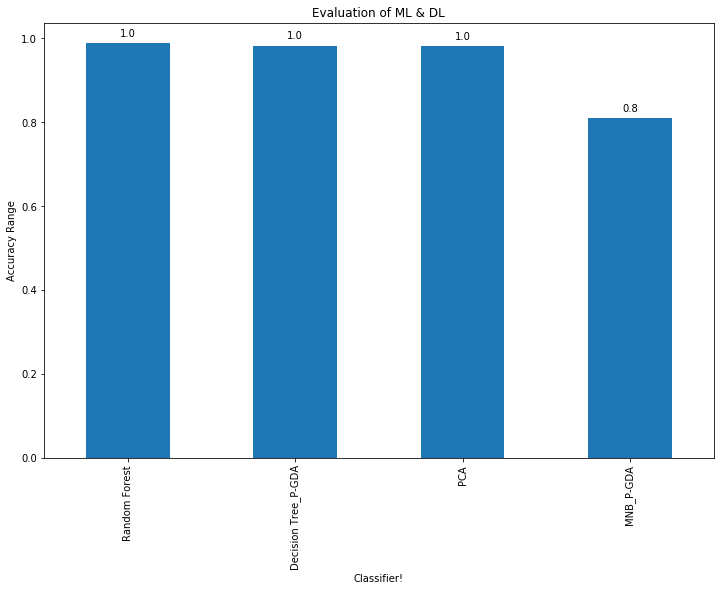

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [RF_ACC,DT_ACC,PCA_ACC,MNB_ACC]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['Random Forest', 'Decision Tree_P-GDA','PCA','MNB_P-GDA']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

# Sensitivity

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  # Remove the CWD from sys.path while we load stuff.


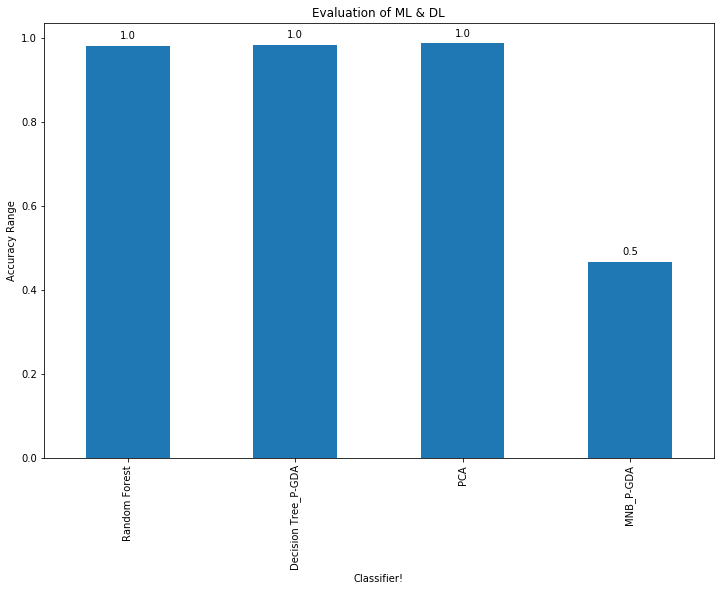

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [RF_SENS,DT_SENS,PCA_SENS,MNB_SENS]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['Random Forest', 'Decision Tree_P-GDA','PCA','MNB_P-GDA']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")